In [6]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

%matplotlib inline

In [4]:
# import data
data = sio.loadmat('data/ml-ex4/ex4data1.mat')

X = data['X']
y = data['y'].ravel()

X.shape, y.shape

((5000, 400), (5000,))

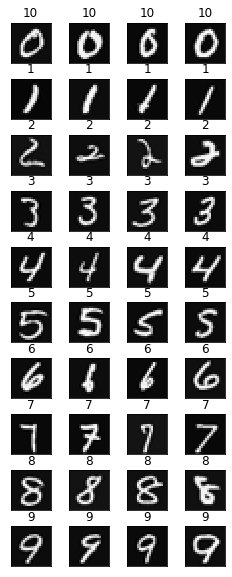

In [9]:
# plotting digits from mat file
rows = 10
cols = 4

selected = np.linspace(0, X.shape[0]-1, rows*cols, dtype='int16')

plt.figure(figsize=(cols, rows))
plt.subplots_adjust(hspace=.4)

for i,idx in enumerate(selected):
    plt.subplot(rows, cols, i+1)
    plt.imshow(X[idx].reshape((20,20), order='F'), cmap=plt.cm.gray)
    plt.title("{}".format(y[idx]))
    plt.xticks(())
    plt.yticks(())

In [15]:
# create a multi layer perceptron with 3 layers
# input, one hidden layer and output layer
# no of units are derived from the number features in X
# output unit by the number classes in y
mlp = MLPClassifier((25,), activation='logistic', solver='lbfgs')
mlp.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
# check score of the trained classifier
mlp.score(X,y)

1.0

In [17]:
# Use 2 stratified randomized folds for cross validation
# where test_size = 0.1 * datasize. Stratified means that
# folds are made by preserving the percentage of samples for each class

cross_v = StratifiedShuffleSplit(2, test_size=0.1, random_state=0)

In [22]:
# run grid search for finding the best values for regularization
# by using the cross validator defined just above
grid_search = GridSearchCV(mlp, param_grid={'alpha':[1e-2, 1e-1, 1e0, 1e1]}, cv=cross_v)
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=2, random_state=0, test_size=0.1,
            train_size=None),
             error_score='raise-deprecating',
             estimator=MLPClassifier(activation='logistic', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(25,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=Fa

In [23]:
# visualise the grid search results
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1.155496,0.091638,0.001482,0.000056,0.01,{'alpha': 0.01},0.910,0.946,0.928,0.018,3
1,1.850536,0.303187,0.001538,0.000113,0.1,{'alpha': 0.1},0.922,0.940,0.931,0.009,2
2,2.425794,0.081677,0.001581,0.000179,1,{'alpha': 1.0},0.934,0.952,0.943,0.009,1
3,3.397785,0.522474,0.001859,0.000350,10,{'alpha': 10.0},0.916,0.926,0.921,0.005,4


In [25]:
# get the best estimator from grid search
mlp_best = grid_search.best_estimator_
mlp_best

MLPClassifier(activation='logistic', alpha=1.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
# best estimator is the one with alpha=1.0
mlp_best.score(X,y)

0.9978

In [27]:
# Extract weight matrix between input and hidden layer
# (input layer size = 400, hidden layer size = 25)
theta1 = mlp_best.coefs_[0].T
theta1.shape

(25, 400)

<Figure size 432x288 with 0 Axes>

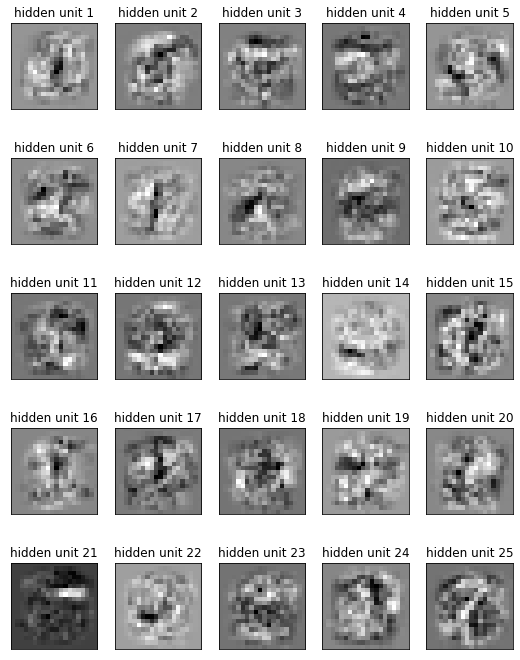

In [31]:
# visalise the hidden weights
rows = 5
cols = 5

plt.subplots_adjust(top=.9, hspace=.4)
plt.figure(figsize=(1.8 * cols, 2.4 * rows))

for i, row in enumerate(theta1):
    plt.subplot(rows, cols, i+1)
    plt.imshow(row.reshape((20, 20), order='F'), cmap=plt.cm.gray)
    plt.title(f'hidden unit {i + 1}')
    plt.xticks(())
    plt.yticks(())
